# Author : Kailash Kumar

# Data Science & Business Analytics Internship Task_1

# Task 1 : Prediction using Supervised Machine Learning

# GRIP @ The Sparks Foundation

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 1 - Reading Data

In [2]:
student_df = pd.read_csv("student_scores.csv")
print("Data import successful")

Data import successful


In [3]:
# it Will Print First 10 row
student_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
student_df.shape

(25, 2)

# Step 2 - Input data Visualization

<Axes: >

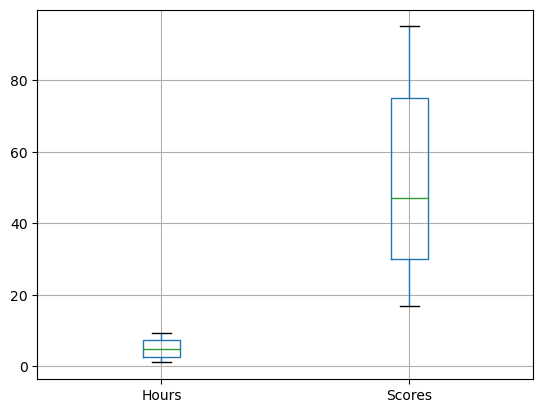

In [7]:
# Checking Outlier In data using Boxplot
student_df.boxplot()

As you can both variable do not have Outlier

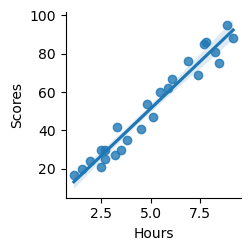

In [8]:
# Check The Relationship between variable
sns.pairplot(student_df,x_vars = ["Hours"],y_vars ="Scores",kind="reg")

From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score.

# Step 3 - Data Preprocessing

In [9]:
X = student_df.iloc[:, :-1].values  
Y = student_df.iloc[:, 1].values 

# Step 4 - Model Training

Splitting the data into training and testing sets..

In [10]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [11]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.6499651894038863
[9.81430544]


# Step 5 - Plotting the Line of regression

Now since our model is trained now, its the time to visualize the best-fit line of regression.

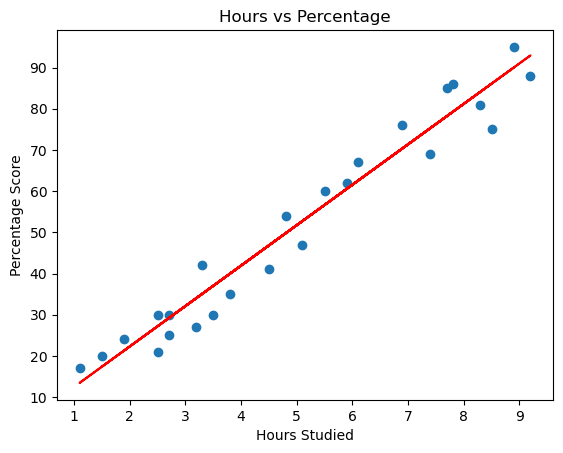

In [12]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line, color="red");
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

# Step 6 - Making Predictions

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [13]:
# Model Prediction
Y_pred = lm.predict(X_test)
print(Y_pred)

[17.37142335 52.70292295 35.03717315 34.05574261 46.81433968]


# Step 7 - Comparing Actual result to the Predicted Model result

In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) 
df 

,Actual,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


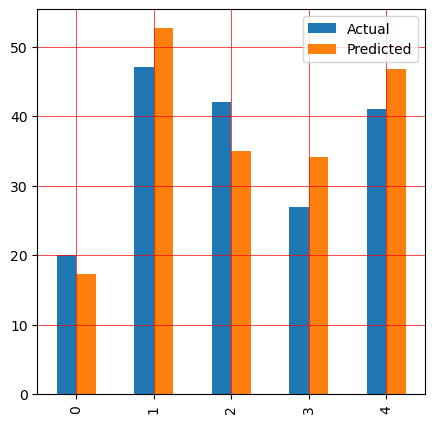

In [16]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [17]:
hours = 9.25
pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.43229053722452


# Step 8 - Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


Mean Absolute Error: 5.632881746692995
Mean Squared Error: 34.300750550687425
Root Mean Squared Error: 5.856684262506168


# Thank You